#FEATURE ENGINEERING - MISSING VALUES

#Lifecycle of a data science project

##1-data collection strategy
from company side,3rd party API's,surveys
##2-feature engineering
handling missing values

###why are their missing values?
survey - depression survey -  information people will not insert
 1- they hesitate to put down the information
 2- survey info are not that valid
 3- men hesitate to show the salary
 4- women hesitate to give number
 5- people may have died---NaN

data science project - dataset should be collected from multiple sources
##what are the different types of missing data?
###1- missing completely at random,MCAR:
Means: the probability of a value being missing is independent of both observed and unobserved data.
In other words, there is no systematic reason why the data is missing.
The missingness is just pure random noise.
Missingness has no relationship with either observed or unobserved data.
Pure randomness.
✅ Safest case: dropping or imputing values won’t bias the dataset.
👉 Example: A lab technician spills coffee on 10 random patient forms.
###missing data not at random(MNAR):systematic missing values
Missingness is directly related to the missing value itself.
The reason data is missing is hidden in the unobserved data.
⚠️ Most dangerous, because we cannot fully detect or correct it without strong assumptions.
👉 Example:
People with very high income don’t report their income.
Patients with severe depression skip mental health survey questions.
###missing at random(MAR)
MAR (Missing At Random)
→ Missingness depends on observed data but not on the missing value itself.
Example: Older people skip income questions more often (missingness depends on age, which you do observe).
men-hide their income
women-hide their age

In [2]:
from google.colab import files
files.upload()

Saving train (1).csv to train (1).csv


{'train (1).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('train (1).csv')

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
import numpy as np

In [9]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
##find the percentage of null values
df['Cabin_null'].mean()

np.float64(0.7710437710437711)

In [10]:
 df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [11]:
#1 basically means null
df['Cabin_null']

,Cabin_null
0,1
1,0
2,1
3,0
4,1
...,...
886,1
887,0
888,1
889,0


In [12]:
df.groupby(['Survived'])['Cabin_null'].mean()
#survived=1 nonsurvived=0

,Cabin_null
Survived,
0,0.876138
1,0.602339


###all the techniques of handling missing values

1- mean/median/mode replacement
2- Random sample imputation
3- capturing NaN values with a new feature
4- end of distribution imputation
5- arbitrary imputation
6- frequent categories imputation

###mean/median/mode imputation
when should we apply?
mean/median imputation has the assumption that the data are missing completely at random(MAR)
we solve this by replacing the NaN with
the most frequent occurance of the variables

In [13]:
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [15]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)

In [16]:
#compute median value
median=df.Age.median()
median

28.0

In [17]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [18]:
print(df['Age'].std())
print(df["Age_median"].std())

14.526497332334044
13.019696550973194


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

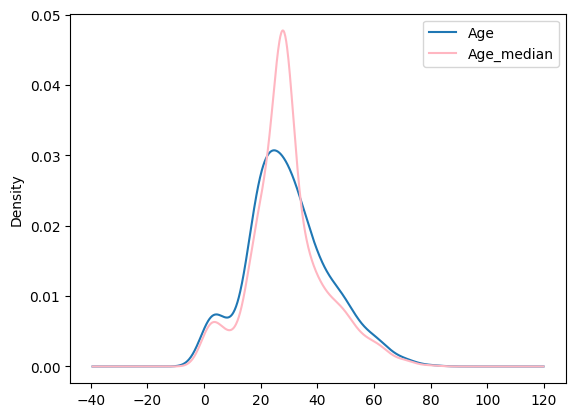

In [21]:
fig = plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='lightpink')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

###advantages and disadvantages of mean/median imputation
####advantages:
easy to impliment robust to outliers,faster way to obtain the complete dataset
####disadvantages:
change or distortion in the original variance, impact correlation